# This will include Loading, Cleaning, Wrangling, and the initial steps of Explorative analysis. 
## Later I will separate the Loading + Transformation from Analysis and later from Insights and Vis.

In [672]:
import pandas as pd
import numpy as np

df = pd.read_csv('../raw-data/2022-stack-dev-surv/survey_results_public.csv')
dfs =  pd.read_csv('../raw-data/2022-stack-dev-surv/survey_results_schema.csv')
df



,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for compa...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., Uni...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScr

In [673]:
pd.set_option('display.max_columns', None)
df


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for compa...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., Uni...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScr

In [674]:
# Some basic renames to make it more explanatory and easier to work with
df.rename(columns = {'ResponseId':'ResponseID'}, inplace = True)

In [675]:
#Explore the data, draw conclusions on where to focus- from schema and research objectives

In [676]:
#Examine the schema to understand the survey better

In [677]:
# In order to read the contents in the order in which they were asked,
# dfs will hold the qid stripped away to its number component
dfs['qid'] = dfs['qid'].apply(lambda x: x.replace('QID', ''))

#qid column will now hold an integer value, not a string
dfs['qid'] = pd.to_numeric(dfs['qid'])



In [678]:
Survey_sections = ["Some basic information about who you are", 
                   "Employment",
                   "Education + Work + Career",
                   "Tech and culture",
                   "Stack overflow community",
                   "Demographics",
				   "Professional Developer Series",
                   "Teams Questions",
                   "Final thoughts",
				   ]



""" 

To split in a few tables:
- Participants - who they are (Basic Info + Demographics)
- Education and learning (Education+Work+Career, Work experience)
- Work (employment, career, teams/work experience)

I will use the Tech and culture to focus on Data Science ?

Converted Q yearly means currency transaction done. i assume USD

Team soft/hard interesting but leave alone. have enough for now. there its really personality asses and take grain salt

How many even answer for cert

Teams questions includes work experience (repeat for that which covers same question)

There is a field called 'other' for many questions. cant get to finding those answers.
for many, incl: 
missing, so what does that mean. disregard column, ignore, etc.

The numbers in schema include the multiple choice answers

QUestions to look into
how many out of soft skills did X and Y in their background
most common advice for learning fast
can you get good without doing it as a hobby, so only 9-5
self taught and non hobby, how important team is
is a larger org more supportive, do people have a faster path there ?



https://stackoverflow.blog/2021/12/07/new-data-what-developers-look-for-in-future-job-opportunities/
https://www.docker.com/blog/key-insights-from-stack-overflows-2022-developer-survey/
https://www.educative.io/blog/stackoverflow-dev-survey-key-takeaways-learners
https://survey.stackoverflow.co/2022/

"""


" \n\nTo split in a few tables:\n- Participants - who they are (Basic Info + Demographics)\n- Education and learning (Education+Work+Career, Work experience)\n- Work (employment, career, teams/work experience)\n\nI will use the Tech and culture to focus on Data Science ?\n\nConverted Q yearly means currency transaction done. i assume USD\n\nTeam soft/hard interesting but leave alone. have enough for now. there its really personality asses and take grain salt\n\nHow many even answer for cert\n\nTeams questions includes work experience (repeat for that which covers same question)\n\nThere is a field called 'other' for many questions. cant get to finding those answers.\nfor many, incl: \nmissing, so what does that mean. disregard column, ignore, etc.\n\nThe numbers in schema include the multiple choice answers\n\nQUestions to look into\nhow many out of soft skills did X and Y in their background\nmost common advice for learning fast\ncan you get good without doing it as a hobby, so only 9

In [679]:
#Select the data we are interested in and simplify what we are working with

cols_dfa1 = [
					'ResponseID',
                    
                    'MainBranch',
                    'DevType',
                    'ICorPM', #whether technical role or more about leadership, soft skills
                    
					'Age',
                    'Gender',
                    'Accessibility',
                    'Country',
                    
                    'Employment',
                    
					'OrgSize',
                    
                    'CodingActivities',
                    'EdLevel',
                    'LearnCode',
                    'LearnCodeOnline',
                    'LearnCodeCoursesCert',
                    
                    'YearsCode', #asked together
                    'YearsCodePro', #asked together
                    'WorkExp', #under the team section

					'Currency',
                    'CompTotal',
                    'CompFreq',
                    'ConvertedCompYearly',
                                        
                    
]


dfa1 = df[cols_dfa1].copy()

dfa1[0:20]


,ResponseID,MainBranch,DevType,ICorPM,Age,Gender,Accessibility,Country,Employment,OrgSize,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,NaN,NaN,NaN,NaN,NaN,Canada,"Employed, full-time",NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAD\tCanadian dollar,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",NaN,25-34 years old,Man,None of the above,United Kingdom of Great Britain and Northern Ireland,"Employed, full-time",20 to 99 employees,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., Uni...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,NaN,GBP\tPound sterling,32000.0,Yearly,40205.0
3,4,I am a developer by profession,"Developer, full-stack",NaN,35-44 years old,Man,None of the above,Israel,"Employed, full-time",100 to 499 employees,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,17,NaN,ILS\tIsraeli new shekel,60000.0,Monthly,215232.0
4,5,I am a developer by profession,"Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Develop...",NaN,25-34 years old,NaN,NaN,United States of America,"Employed, full-time",20 to 99 employees,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily ...",NaN,8,3,NaN,USD\tUnited States dollar,NaN,NaN,NaN
5,6,"I am not primarily a developer, but I write code sometimes as part of my work",NaN,NaN,25-34 years old,"Or, in your own words:","Or, in your own words:",Germany,"Student, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN
6,7,I code primarily as a hobby,NaN,NaN,Under 18 years old,Man,None of the above,India,"Student, part-time",NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Other online resources (e.g., videos, blogs, forum)",Stack Overflow;Video-based Online Courses,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
7,8,I am a developer by profession,"Developer, full-stack;Student",NaN,18-24 years old,Man,None of the above,India,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning a degree,Online Courses or Certification,NaN,Coursera;Udemy,1,NaN,NaN,NaN,NaN,NaN,NaN
8,9,I am a developer by profession,"Developer, back-end",Independent contributor,25-34 years old,Woman,"Or, in your own words:",Netherlands,"Employed, full-time",I don’t know,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,6,6.0,EUR European Euro,46000.0,Yearly,49056.0
9,10,I am a developer by profession,"Developer, desktop or enterprise applications;Developer, mobile;Educator",NaN,45-54 years old,Woman,None of the above,Croatia,"Independent contractor, freelancer, or self-employed","Just me - I am a freelancer, sole proprietor, etc.",Hobby;Contribute to open-source projects;Bootstrapping a business,Some college/university study without earning a degree,"Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Written Tutorials;Stack Ov

In [680]:
#see which columns need processing for simplifying
#print(dfs[["qname", "question"]])
pd.set_option('display.max_colwidth', 120)

dfs[dfs["type"] == 'MC'][["qid","qname", "question"]].sort_values(by='qid')

,qid,qname,question
3,2,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>..."
18,6,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>"
8,25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *
15,29,OrgSize,Approximately how many people are employed by the company or organization you currently work for?
14,31,DevType,Which of the following describes your current job? Please select all that apply.
12,32,YearsCode,"Including any education, how many years have you been coding in total?"
13,34,YearsCodePro,"NOT including education, how many years have you coded professionally (as a part of your work)?"
19,50,Currency,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable est..."
21,52,CompFreq,"Is that compensation weekly, monthly, or yearly?"
39,100,SOVisitFreq,How frequently would you say you visit Stack Overflow?


In [681]:
# compute NaN and make decision of how to handle it

In [682]:
# how many NaN in some important columns

NaN_share = dfa1.isna().mean().round(4) * 100
NaN_ConvertedCompYearly

ResponseID               0.00
MainBranch               0.00
DevType                 16.33
ICorPM                  50.48
Age                      3.17
Gender                   3.30
Accessibility            8.22
Country                  2.04
Employment               2.13
OrgSize                 30.34
CodingActivities        19.61
EdLevel                  2.32
LearnCode                2.30
LearnCodeOnline         30.82
LearnCodeCoursesCert    59.89
YearsCode                2.64
YearsCodePro            32.00
WorkExp                 49.82
Currency                30.03
CompTotal               47.56
CompFreq                39.37
ConvertedCompYearly     48.04
dtype: float64

In [683]:
# convert numeric values into correct data type
dfa1["YearsCodePro"] = pd.to_numeric(dfa1["YearsCodePro"], errors='coerce').astype('Int64')
dfa1[["YearsCodePro"]]

,YearsCodePro
0,<NA>
1,<NA>
2,5
3,17
4,3
...,...
73263,5
73264,5
73265,33
73266,31


In [684]:
#View the nested columns unique values

#define the columns that need dummies
nested_cols = ['DevType', 'Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert']
ID_col = ['ResponseID']

sel = ID_col + nested_cols

dfa1_nested_cols = dfa1[sel].copy()

dfa1_nested_cols

nested_cols_unique_values = {}

for col in nested_cols:
	dfa1_nested_cols[col] = dfa1_nested_cols[col].str.split(';')
	#print(col)
	exploded_col = dfa1_nested_cols.explode(col).reset_index(drop=True)
	unique_values_col = exploded_col[col].unique().tolist()
	
	#clear of NaN because that will be embedded in the new table otherwise
	if np.nan in unique_values_col: unique_values_col.remove(np.nan)

	nested_cols_unique_values[col] = unique_values_col

#dfa1_nested_cols
nested_cols_unique_values



{'DevType': ['Data scientist or machine learning specialist',
  'Developer, front-end',
  'Engineer, data',
  'Engineer, site reliability',
  'Developer, full-stack',
  'Developer, back-end',
  'Developer, desktop or enterprise applications',
  'Developer, QA or test',
  'Student',
  'Developer, mobile',
  'Educator',
  'Engineering manager',
  'Database administrator',
  'Academic researcher',
  'DevOps specialist',
  'Other (please specify):',
  'Developer, embedded applications or devices',
  'Developer, game or graphics',
  'Project manager',
  'Cloud infrastructure engineer',
  'Data or business analyst',
  'Designer',
  'Scientist',
  'Product manager',
  'Senior Executive (C-Suite, VP, etc.)',
  'System administrator',
  'Blockchain',
  'Marketing or sales professional',
  'Security professional'],
 'Employment': ['Employed, full-time',
  'Student, full-time',
  'Student, part-time',
  'Not employed, but looking for work',
  'Independent contractor, freelancer, or self-employed'

In [685]:
dfa1

,ResponseID,MainBranch,DevType,ICorPM,Age,Gender,Accessibility,Country,Employment,OrgSize,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,NaN,NaN,NaN,NaN,NaN,Canada,"Employed, full-time",NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,CAD\tCanadian dollar,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",NaN,25-34 years old,Man,None of the above,United Kingdom of Great Britain and Northern Ireland,"Employed, full-time",20 to 99 employees,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., Uni...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,NaN,GBP\tPound sterling,32000.0,Yearly,40205.0
3,4,I am a developer by profession,"Developer, full-stack",NaN,35-44 years old,Man,None of the above,Israel,"Employed, full-time",100 to 499 employees,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,17,NaN,ILS\tIsraeli new shekel,60000.0,Monthly,215232.0
4,5,I am a developer by profession,"Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Develop...",NaN,25-34 years old,NaN,NaN,United States of America,"Employed, full-time",20 to 99 employees,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily ...",NaN,8,3,NaN,USD\tUnited States dollar,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Developer, back-end",Independent contributor,25-34 years old,Man,None of the above,Nigeria,"Employed, full-time",100 to 499 employees,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);On the job training;Online Courses or Cer...",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Udemy,8,5,5.0,USD\tUnited States dollar,60000.0,Yearly,NaN
73264,73265,I am a developer by profession,Data scientist or machine learning specialist,Independent contributor,25-34 years old,Man,None of the above,United States of America,"Employed, full-time",I don’t know,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Onli...",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Coursera;Udemy;Udacity,6,5,6.0,USD\tUnited States dollar,107000.0,Yearly,NaN
73265,73266,"I am not primarily a developer, but I write code sometimes as part of my work","Developer, full-stack;Developer, desktop or enterprise applications;System administrator",Independent contributor,55-64 years old,Man,None of the above,United States of America,"Employed, full-time",20 to 99 employees,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);O...",Technical documentation;Programming Games;Stack Overflow;Online books;Video-based Online Courses;How-to videos;Writt...,Udemy;Codecademy;Pluralsight;edX,42,33,42.0,USD\

In [686]:

def survey_col_get_dummies(nested_col):
	
	#should have a test here that lists coincide with expected format


	#create a working copy of ID and relevant column
	dfa1_dummies = dfa1[["ResponseID", nested_col]].copy()

	# replace existing comma with dash to avoid confusion when making lists next
	dfa1_dummies[nested_col] = dfa1_dummies[nested_col].str.replace(", ", " - ")
	
	# use the semicolon to parse data into lists
	dfa1_dummies[nested_col] = dfa1_dummies[nested_col].str.split(';')
	
	# do the dummies split and group the individual responses by ResponseID (Participant, responder unique ID)
	dfa1_dummies = pd.get_dummies(dfa1_dummies.explode(nested_col)).groupby('ResponseID').sum()
	
	return dfa1_dummies



#view a preview of the end result
dfa1_dummies_t = survey_col_get_dummies("DevType")
dfa1_dummies_t

,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer - QA or test,DevType_Developer - back-end,DevType_Developer - desktop or enterprise applications,DevType_Developer - embedded applications or devices,DevType_Developer - front-end,DevType_Developer - full-stack,DevType_Developer - game or graphics,DevType_Developer - mobile,DevType_Educator,DevType_Engineer - data,DevType_Engineer - site reliability,DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Scientist,DevType_Security professional,DevType_Senior Executive (C-Suite - VP - etc.),DevType_Student,DevType_System administrator
ResponseID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73265,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73266,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [687]:
# We will be splitting the Nested columns of interest into dummies

#start a new dataframe which will be concatenated with the results
dfa1_dummies_0 = dfa1[["ResponseID"]].copy()

#do the same for each column except "ResponseID"
for col in dfa1.columns.drop("ResponseID"):

	# if the column is MP (that is nested and needs dummies) - then get them and append
	if col in nested_cols:
		dummies_to_add = survey_col_get_dummies(col)
		#replace floats by integers
		# /*/*/*/ To be done 
		dfa1_dummies_0 = dfa1_dummies_0.join(dummies_to_add)

	else:
	# if the column does not need dummies, just join with it. double brackets because we want a df not a series
		dfa1_dummies_0 = dfa1_dummies_0.join(dfa1[[col]])

dfa1d = dfa1_dummies_0
dfa1d

,ResponseID,MainBranch,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer - QA or test,DevType_Developer - back-end,DevType_Developer - desktop or enterprise applications,DevType_Developer - embedded applications or devices,DevType_Developer - front-end,DevType_Developer - full-stack,DevType_Developer - game or graphics,DevType_Developer - mobile,DevType_Educator,DevType_Engineer - data,DevType_Engineer - site reliability,DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Scientist,DevType_Security professional,DevType_Senior Executive (C-Suite - VP - etc.),DevType_Student,DevType_System administrator,ICorPM,Age,Gender,Accessibility,Country,Employment_Employed - full-time,Employment_Employed - part-time,Employment_I prefer not to say,Employment_Independent contractor - freelancer - or self-employed,Employment_Not employed - and not looking for work,Employment_Not employed - but looking for work,Employment_Retired,Employment_Student - full-time,Employment_Student - part-time,OrgSize,CodingActivities_Bootstrapping a business,CodingActivities_Contribute to open-source projects,CodingActivities_Freelance/contract work,CodingActivities_Hobby,CodingActivities_I don’t code outside of work,CodingActivities_Other (please specify):,CodingActivities_School or academic work,EdLevel,LearnCode_Books / Physical media,LearnCode_Coding Bootcamp,LearnCode_Colleague,LearnCode_Friend or family member,LearnCode_Hackathons (virtual or in-person),LearnCode_On the job training,LearnCode_Online Courses or Certification,LearnCode_Other (please specify):,LearnCode_Other online resources (e.g. - videos - blogs - forum),LearnCode_School (i.e. - University - College - etc),LearnCodeOnline_Auditory material (e.g. - podcasts),LearnCodeOnline_Blogs,LearnCodeOnline_Certification videos,LearnCodeOnline_Coding sessions (live or recorded),LearnCodeOnline_How-to videos,LearnCodeOnline_Interactive tutorial,LearnCodeOnline_Online books,LearnCodeOnline_Online challenges (e.g. - daily or weekly coding challenges),LearnCodeOnline_Online forum,LearnCodeOnline_Other (Please specify):,LearnCodeOnline_Programming Games,LearnCodeOnline_Stack Overflow,LearnCodeOnline_Technical documentation,LearnCodeOnline_Video-based Online Courses,LearnCodeOnline_Written Tutorials,LearnCodeOnline_Written-based Online Courses,LearnCodeCoursesCert_Codecademy,LearnCodeCoursesCert_Coursera,LearnCodeCoursesCert_Other,LearnCodeCoursesCert_Pluralsight,LearnCodeCoursesCert_Skillsoft,LearnCodeCoursesCert_Udacity,LearnCodeCoursesCert_Udemy,LearnCodeCoursesCert_edX,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,<NA>,NaN,CAD\tCanadian dollar,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,25-34 years old,Man,None of the above,Unite

In [688]:
cols_dfa1

['ResponseID',
 'MainBranch',
 'DevType',
 'ICorPM',
 'Age',
 'Gender',
 'Accessibility',
 'Country',
 'Employment',
 'OrgSize',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'LearnCodeCoursesCert',
 'YearsCode',
 'YearsCodePro',
 'WorkExp',
 'Currency',
 'CompTotal',
 'CompFreq',
 'ConvertedCompYearly']

In [689]:
# which questions are we focusing on
mask = dfs["qname"].isin(cols_dfa1)
dfs[mask][["qname", "question"]]

#correct the order to reflect our data frame analysis 1 (dfa1)
order = cols_dfa1.copy()

#remove the columns that are not in the schema
order.remove("ResponseID")
order.remove("ConvertedCompYearly")

#show us the schema in the relevant order
dfa1_schema = dfs.set_index('qname').loc[order].reset_index()
dfa1_schema[["qname", "question"]]


,qname,question
0,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>..."
1,DevType,Which of the following describes your current job? Please select all that apply.
2,ICorPM,Are you an independent contributor or people manager?
3,Age,What is your age?
4,Gender,"Which of the following describe you, if any? Please check all that apply."
5,Accessibility,"Which of the following describe you, if any? Please check all that apply."
6,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>"
7,Employment,Which of the following best describes your current employment status?
8,OrgSize,Approximately how many people are employed by the company or organization you currently work for?
9,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.


In [690]:
dfs[dfs["qname"] == 'ProfessionalTech']



,qid,qname,question,force_resp,type,selector
60,304,ProfessionalTech,My company has:,False,MC,MAVR


In [691]:
# show us the responses for people who have 2-5 years of experience and work with data in employed status. 

mask_years_exp = dfa1d["YearsCodePro"].between(2, 5)

options_mask_employed = ["Employment_Independent contractor - freelancer - or self-employed",
						"Employment_Employed - full-time"]
mask_employed = dfa1d[options_mask_employed].isin([1]).any(axis=1)


options_mask_data_roles = ["DevType_Data or business analyst", 
							"DevType_Data scientist or machine learning specialist",
							"DevType_Engineer - data",
							"DevType_Other (please specify):",
							]
mask_data_roles = dfa1d[options_mask_data_roles].isin([1]).any(axis=1)

dfa1d_filter_1 = dfa1d[mask_years_exp & mask_employed & mask_data_roles]

dfa1d_filter_1


,ResponseID,MainBranch,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer - QA or test,DevType_Developer - back-end,DevType_Developer - desktop or enterprise applications,DevType_Developer - embedded applications or devices,DevType_Developer - front-end,DevType_Developer - full-stack,DevType_Developer - game or graphics,DevType_Developer - mobile,DevType_Educator,DevType_Engineer - data,DevType_Engineer - site reliability,DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Scientist,DevType_Security professional,DevType_Senior Executive (C-Suite - VP - etc.),DevType_Student,DevType_System administrator,ICorPM,Age,Gender,Accessibility,Country,Employment_Employed - full-time,Employment_Employed - part-time,Employment_I prefer not to say,Employment_Independent contractor - freelancer - or self-employed,Employment_Not employed - and not looking for work,Employment_Not employed - but looking for work,Employment_Retired,Employment_Student - full-time,Employment_Student - part-time,OrgSize,CodingActivities_Bootstrapping a business,CodingActivities_Contribute to open-source projects,CodingActivities_Freelance/contract work,CodingActivities_Hobby,CodingActivities_I don’t code outside of work,CodingActivities_Other (please specify):,CodingActivities_School or academic work,EdLevel,LearnCode_Books / Physical media,LearnCode_Coding Bootcamp,LearnCode_Colleague,LearnCode_Friend or family member,LearnCode_Hackathons (virtual or in-person),LearnCode_On the job training,LearnCode_Online Courses or Certification,LearnCode_Other (please specify):,LearnCode_Other online resources (e.g. - videos - blogs - forum),LearnCode_School (i.e. - University - College - etc),LearnCodeOnline_Auditory material (e.g. - podcasts),LearnCodeOnline_Blogs,LearnCodeOnline_Certification videos,LearnCodeOnline_Coding sessions (live or recorded),LearnCodeOnline_How-to videos,LearnCodeOnline_Interactive tutorial,LearnCodeOnline_Online books,LearnCodeOnline_Online challenges (e.g. - daily or weekly coding challenges),LearnCodeOnline_Online forum,LearnCodeOnline_Other (Please specify):,LearnCodeOnline_Programming Games,LearnCodeOnline_Stack Overflow,LearnCodeOnline_Technical documentation,LearnCodeOnline_Video-based Online Courses,LearnCodeOnline_Written Tutorials,LearnCodeOnline_Written-based Online Courses,LearnCodeCoursesCert_Codecademy,LearnCodeCoursesCert_Coursera,LearnCodeCoursesCert_Other,LearnCodeCoursesCert_Pluralsight,LearnCodeCoursesCert_Skillsoft,LearnCodeCoursesCert_Udacity,LearnCodeCoursesCert_Udemy,LearnCodeCoursesCert_edX,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
41,42,I am a developer by profession,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Independent contributor,18-24 years old,Man,None of the above,Israel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20 to 99 employees,0.0,0.0,1.0,1.0,0.0,0.0,0.0,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3.0,ILS\tIsraeli new shekel,19000.0,Monthly,68160.0
51,52,I am a developer by profession,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Independent contributor,25-34 years old,Man,None of the above,Poland,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20 to 99 employees,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

172374.24000000066

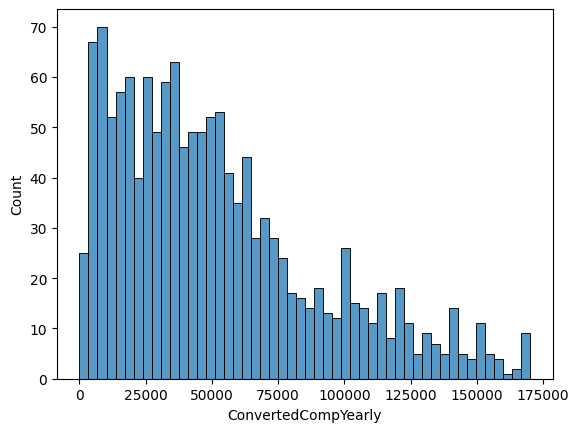

In [692]:
import seaborn as sns
import matplotlib.pyplot as plt

# show answers to the question "how much they earn"


#ignore outliers
percentile = dfa1d_filter_1["ConvertedCompYearly"].quantile(0.92)

# mask for outliers in ConvertedCompYearly
mask_percentile_ConvertedCompYearly = dfa1d_filter_1["ConvertedCompYearly"] < percentile

#show the distribution only for those that fall within percentile
sns.histplot(dfa1d_filter_1[mask_percentile_ConvertedCompYearly]["ConvertedCompYearly"], bins=50)
percentile

<AxesSubplot: >

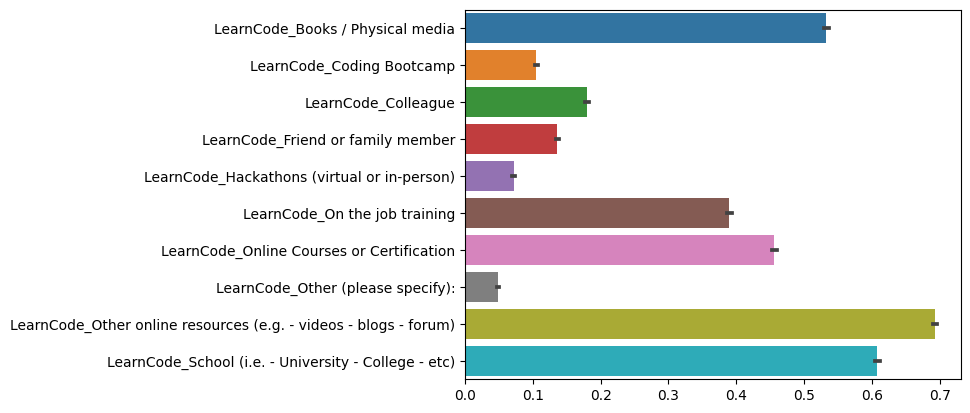

In [693]:
# show answers to the question "how they learned to code"

dfa1d_LearnCode = dfa1d.filter(regex='^LearnCode_')

sns.barplot(data=dfa1d_LearnCode, orient='h')

<AxesSubplot: >

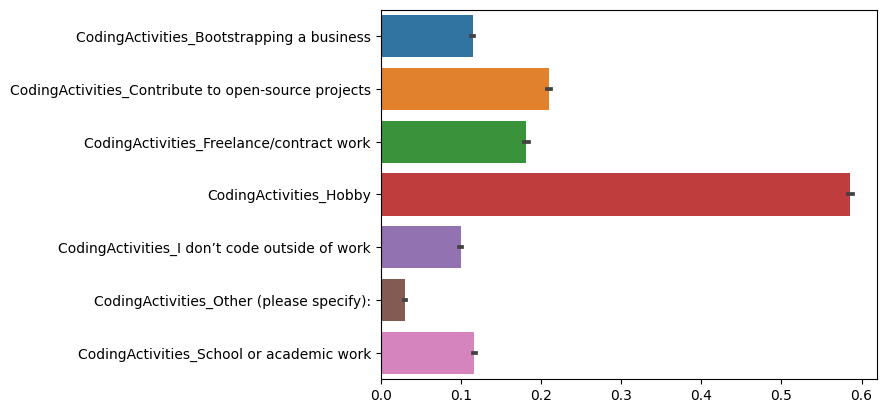

In [694]:
# show answers to the question "how they learned to code"

dfa1d_CodingActivities = dfa1d.filter(regex='^CodingActivities_')

sns.barplot(data=dfa1d_CodingActivities, orient='h')


In [695]:
# exclude soft skills and people managers
# optional: coding activities
# code outside of work or not
# path to get to soft skills
